In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

# Read in the data

df = pd.read_csv(r'C:\Users\Oluwanifemi\Documents\Data Projects\movie industry data\movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# let's see if there's any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
# column datatypes

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
# fill empty columns as o
df = df.fillna(0)

# change data types
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [44]:
df['correct_year'] = df['released'].astype(str).str[:4]

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,6587,7,6,1980,1706,8.4,927000.0,2589,4015,1048,55,19000000,46998772,2320,146.0,1706
1,5573,7,1,1980,1493,5.8,65000.0,2269,1633,328,56,4500000,58853106,732,104.0,1493
2,5142,5,0,1980,1772,8.7,1200000.0,1111,2568,1746,56,18000000,538375067,1541,124.0,1772
3,286,5,4,1980,1493,7.7,221000.0,1301,2001,2247,56,3500000,83453539,1813,88.0,1493
4,1027,7,4,1980,1544,7.3,108000.0,1054,522,411,56,6000000,39846344,1778,98.0,1544


In [43]:
df_sort = df.sort_values(by=['gross'], inplace=False, ascending=False)

df_sort.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,533,6,0,2009,697,7.8,1100000.0,1155,1779,2335,56,237000000,2847246203,2254,162.0,11
7445,535,6,0,2019,184,8.4,903000.0,162,744,2242,56,356000000,2797501328,1607,181.0,9
3045,6896,6,6,1997,705,7.8,1100000.0,1155,1779,1596,56,200000000,2201647264,2254,194.0,11
6663,5144,6,0,2015,699,7.8,876000.0,1125,2551,525,56,245000000,2069521700,1541,138.0,11
7244,536,6,0,2018,193,8.4,897000.0,162,744,2242,56,321000000,2048359754,1607,149.0,9


In [20]:
# to display all the rows in the database
pd.set_option('display.max_rows', None)

In [42]:
#Drop any duplicates
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,6587,7,6,1980,1706,8.4,927000.0,2589,4015,1048,55,19000000,46998772,2320,146.0,15
1,5573,7,1,1980,1493,5.8,65000.0,2269,1633,328,56,4500000,58853106,732,104.0,14
2,5142,5,0,1980,1772,8.7,1200000.0,1111,2568,1746,56,18000000,538375067,1541,124.0,15
3,286,5,4,1980,1493,7.7,221000.0,1301,2001,2247,56,3500000,83453539,1813,88.0,14
4,1027,7,4,1980,1544,7.3,108000.0,1054,522,411,56,6000000,39846344,1778,98.0,14


In [41]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,6587,7,6,1980,1706,8.4,927000.0,2589,4015,1048,55,19000000,46998772,2320,146.0,15
1,5573,7,1,1980,1493,5.8,65000.0,2269,1633,328,56,4500000,58853106,732,104.0,14
2,5142,5,0,1980,1772,8.7,1200000.0,1111,2568,1746,56,18000000,538375067,1541,124.0,15
3,286,5,4,1980,1493,7.7,221000.0,1301,2001,2247,56,3500000,83453539,1813,88.0,14
4,1027,7,4,1980,1544,7.3,108000.0,1054,522,411,56,6000000,39846344,1778,98.0,14


In [24]:
#budget high correlation
#company high correlation


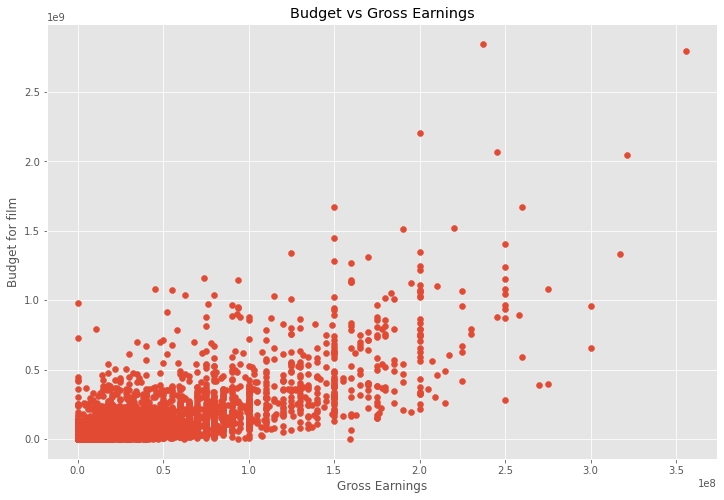

In [26]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for film')

plt.show()

In [27]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July


<AxesSubplot:xlabel='budget', ylabel='gross'>

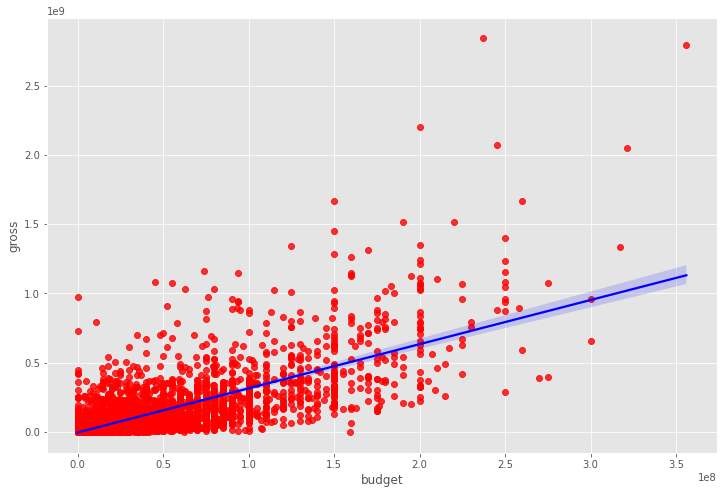

In [29]:
#plt budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [30]:
#looking at correlations

df.corr(method='pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


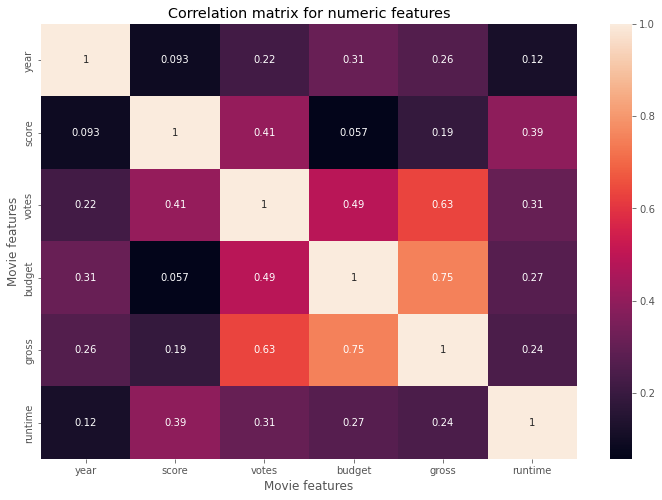

In [33]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for numeric features')

plt.xlabel('Movie features')

plt.ylabel('Movie features')

plt.show()

In [34]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July


In [40]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,6587,7,6,1980,1706,8.4,927000.0,2589,4015,1048,55,19000000,46998772,2320,146.0,15
1,5573,7,1,1980,1493,5.8,65000.0,2269,1633,328,56,4500000,58853106,732,104.0,14
2,5142,5,0,1980,1772,8.7,1200000.0,1111,2568,1746,56,18000000,538375067,1541,124.0,15
3,286,5,4,1980,1493,7.7,221000.0,1301,2001,2247,56,3500000,83453539,1813,88.0,14
4,1027,7,4,1980,1544,7.3,108000.0,1054,522,411,56,6000000,39846344,1778,98.0,14


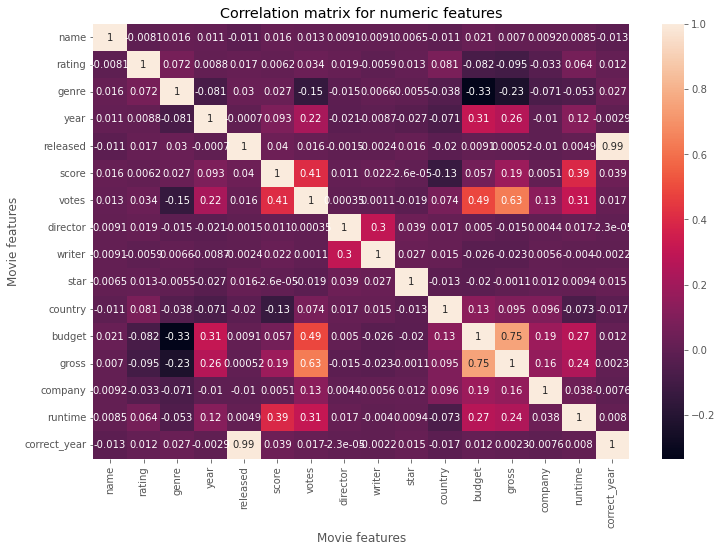

In [36]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for numeric features')

plt.xlabel('Movie features')

plt.ylabel('Movie features')

plt.show()

In [37]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released       -0.011311
              score           0.016377
              votes           0.013038
              director        0.009079
              writer          0.009081
              star            0.006472
              country        -0.010737
              budget          0.020548
              gross           0.006989
              company         0.009211
              runtime         0.008483
              correct_year   -0.013132
rating        name           -0.008069
              rating          1.000000
              genre           0.072423
              year            0.008779
              released        0.016613
              score           0.006192
              votes           0.033743
              director        0.019483
              writer         -0.005921
              star       

In [38]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget        genre          -0.334021
genre         budget         -0.334021
gross         genre          -0.234297
genre         gross          -0.234297
votes         genre          -0.145296
genre         votes          -0.145296
country       score          -0.133346
score         country        -0.133346
rating        gross          -0.095450
gross         rating         -0.095450
budget        rating         -0.081939
rating        budget         -0.081939
year          genre          -0.081261
genre         year           -0.081261
runtime       country        -0.073319
country       runtime        -0.073319
company       genre          -0.071067
genre         company        -0.071067
country       year           -0.070938
year          country        -0.070938
genre         runtime        -0.052914
runtime       genre          -0.052914
genre         country        -0.037615
country       genre          -0.037615
company       rating         -0.032943
rating        company    

In [39]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross         votes           0.632870
votes         gross           0.632870
budget        gross           0.750157
gross         budget          0.750157
correct_year  released        0.994590
released      correct_year    0.994590
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
dtype: float64

In [ ]:
# Votes and gross have the highest correlation to gross earnings